In [132]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn import tree

In [2]:
df = pd.read_csv("movies.csv", encoding='latin1')

In [3]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [179]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [8]:
df['budget'].max()

300000000.0

In [9]:
df['budget'].min()

0.0

In [50]:
filmParAnnee = df.groupby('year').mean()

In [51]:
filmParAnnee['year'] = df['year'].unique()

In [77]:
filmParAnnee.tail()

,budget,gross,runtime,score,votes,year
year,,,,,,
2012,3.537566e+07,4.675185e+07,106.731818,6.439545,117781.404545,2012
2013,3.726553e+07,4.719584e+07,109.804545,6.580000,123968.831818,2013
2014,3.421409e+07,4.688653e+07,108.672727,6.560455,114584.509091,2014
2015,3.379057e+07,4.751462e+07,108.995455,6.499545,80147.440909,2015
2016,4.021309e+07,5.063149e+07,109.418182,6.550000,73044.872727,2016


In [43]:
filmParAnnee['budget'].max()

40213090.90909091

## Partie 1 : Analyse graphique des données

### Diagrammes de répartitions des données 

(array([2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
        1., 1., 2., 1., 1., 1., 1., 1., 2.]),
 array([1986.        , 1987.15384615, 1988.30769231, 1989.46153846,
        1990.61538462, 1991.76923077, 1992.92307692, 1994.07692308,
        1995.23076923, 1996.38461538, 1997.53846154, 1998.69230769,
        1999.84615385, 2001.        , 2002.15384615, 2003.30769231,
        2004.46153846, 2005.61538462, 2006.76923077, 2007.92307692,
        2009.07692308, 2010.23076923, 2011.38461538, 2012.53846154,
        2013.69230769, 2014.84615385, 2016.        ]),
 <BarContainer object of 26 artists>)

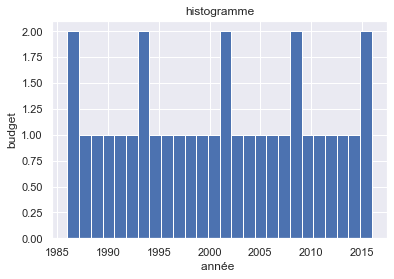

In [80]:
plt.xlabel('année ')
plt.ylabel('budget')
plt.title('histogramme')
plt.hist(filmParAnnee['year'], bins=26)

c:\users\gruel\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


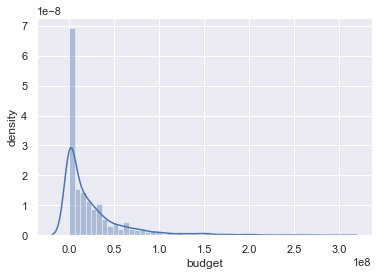

In [128]:
ax = sns.distplot(df[['budget']],kde=True)
ax.set(xlabel='budget', ylabel='density')
plt.show()

### Diagramme a moustache 

<AxesSubplot:xlabel='year', ylabel='budget'>

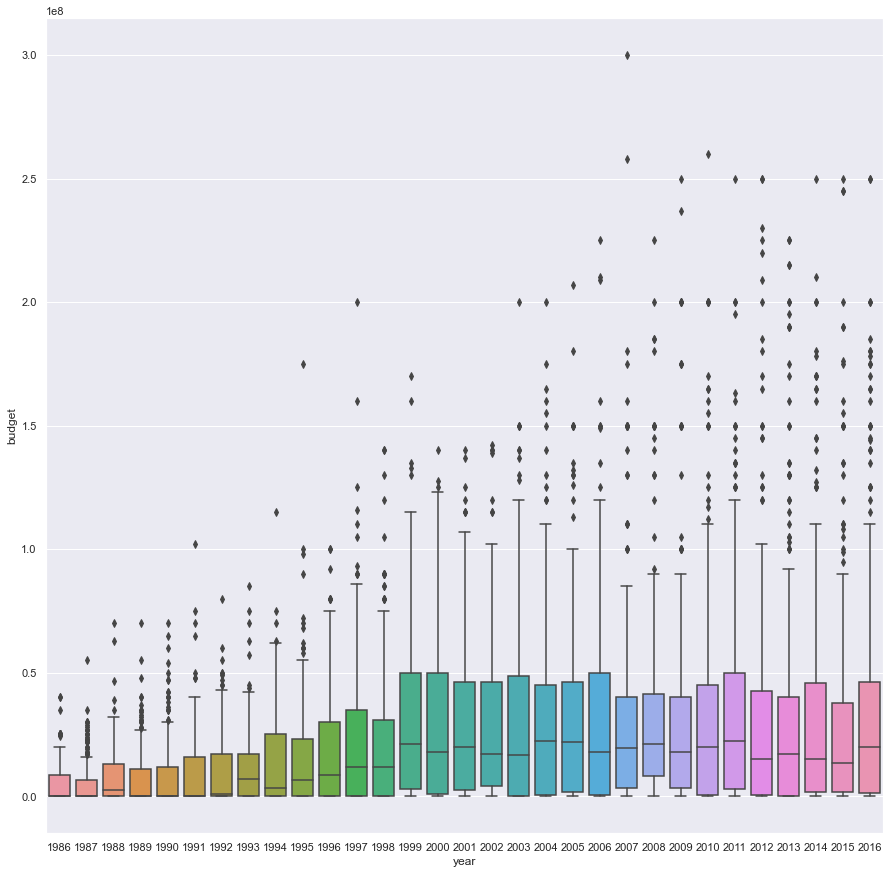

In [59]:
fig = plt.gcf()
fig.set_size_inches(15,15)
sns.boxplot(x='year',
           y='budget',
           data=df )

### HeatMap

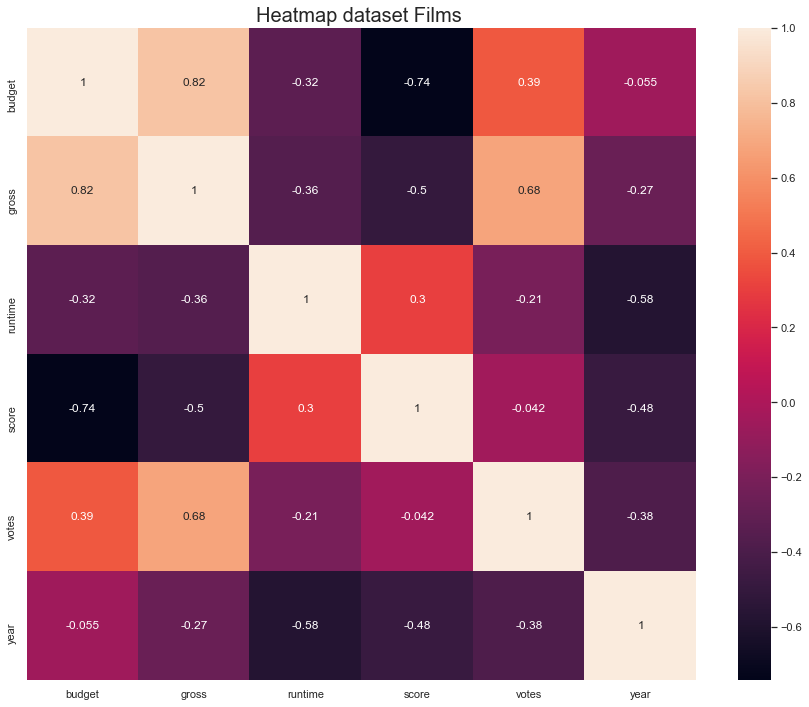

In [129]:
plt.figure(figsize=(15,12))


plt.title('Heatmap dataset Films ', fontsize=20)
sns.heatmap(df.corr().astype(float).corr(),vmax=1.0, annot=True)
plt.show()

## Partie 2: Model Building

In [97]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [190]:
y = df["budget"]
x = df[["year","runtime"]]

In [191]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3, random_state=7)

In [192]:
x_train

,year,runtime
594,1988,110
1561,1993,130
755,1989,115
6444,2015,101
3560,2002,94
...,...,...
5699,2011,89
2550,1997,101
537,1988,121
1220,1991,95


### arbre de décision 

In [193]:
model = DecisionTreeClassifier()

In [194]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [195]:
predictions = model.predict(x_train)
print(accuracy_score(y_train, predictions))

0.5071219103477168


### Regression lineaire

In [196]:
y = df["budget"]
x = df[["year","gross"]]

In [197]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3, random_state=7)

In [198]:
x_train

,year,gross
594,1988,1884315.0
1561,1993,183875760.0
755,1989,8800000.0
6444,2015,1978592.0
3560,2002,213307889.0
...,...,...
5699,2011,542.0
2550,1997,1200000.0
537,1988,14545844.0
1220,1991,3752426.0


In [199]:
clf = LinearRegression().fit(x_train, y_train)

In [200]:
clf.predict(x_test)

array([1.61238704e+08, 5.69231945e+07, 1.24862177e+07, ...,
       3.37168367e+07, 1.18093246e+06, 5.83787190e+06])

In [201]:
clf.score(x_test,y_test)

0.5093462446148598

In [202]:
clf.coef_

array([6.74039670e+05, 4.40567664e-01])

## Features Importance

#### arbre de décision

Feature: 0, Score: 0.35790
Feature: 1, Score: 0.64210


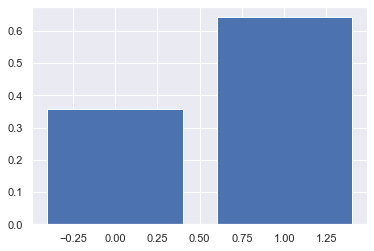

In [126]:
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

####  Regression lineaire

Feature: 0, Score: 1105232.85479
Feature: 1, Score: 489583.58824


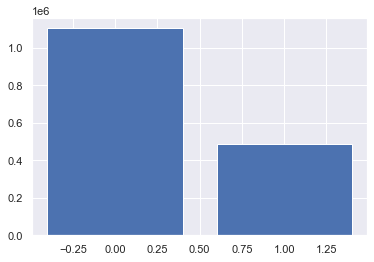

In [124]:
importances = clf.coef_
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importances))], importances)
plt.show()

# RAF observations sur les corrélations 